In [1]:
##Git hub link-# https://github.com/manishhegde/Case-Study-Surprise-House.git
## import the required module from Python 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
house = pd.read_csv("C:\\Users\\17110222\\Desktop\\PG MLAI\\assignment\\train.csv")

In [3]:
house.size

118260

In [4]:
house.shape

(1460, 81)

In [5]:
# summary of the dataset: 1460 rows, 81 columns, check for null values 
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#since only few non null data is available its better to delete the column as its not usuable data,stratergy taken as whichever the data is having more than50% non null value,rest all deleted 
del house['Alley']
del house['PoolQC']
del house['Fence']
del house['MiscFeature']
del house['FireplaceQu']

In [7]:
#Since few items are null values we cannot delete the rows as otehr column data might be important 
house['BsmtQual']     =     house['BsmtQual'].fillna("Not Specified")
house['BsmtCond']     =     house['BsmtCond'].fillna("Not Specified")   
house['BsmtExposure'] =     house['BsmtExposure'].fillna("Not Specified")
house['BsmtFinType1'] =     house['BsmtFinType1'].fillna("Not Specified")
house['GarageCond']   =     house['GarageCond'].fillna("Not Specified")
house['BsmtFinType2'] =     house['BsmtFinType2'].fillna("Not Specified")
house['GarageQual']   =     house['GarageQual'].fillna("Not Specified")
house['MasVnrType']   =     house['MasVnrType'].fillna("Not Specified")

In [8]:
#Handling the null values of LotFrontage &MansVnrArea ,since only 20% & 0.8 % of the data is not availble we can fill with by Take the mean and median, there is no much difference mean is 70, median in 69, hence filling null values with median
print(house['LotFrontage'].median())
print(house['MasVnrArea'].mean())
print(house['GarageYrBlt'].median())

69.0
103.68526170798899
1980.0


In [9]:
#Fill the data with mean and median
house['LotFrontage'] = house['LotFrontage'].fillna(69)
house['MasVnrArea']=house['MasVnrArea'].fillna(103)
house['GarageYrBlt']=house['GarageYrBlt'].fillna(1980)

In [10]:
#delete the items of nul values as its only the 80 datas which is 5% of the data 
#house = house[~(house.GarageType.isnull())]
#house = house[~(house.GarageFinish.isnull())]
#house=house[~(house.Electrical.isnull())]
#Just to cross check before delete can we replace the value
#taken the count to see whether we can fill the data with existsing majority of the table
house['GarageType'].astype('category').value_counts()
house['GarageFinish'].astype('category').value_counts()
house['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [11]:
##filling the value of nulvalues with maximum number of values rather deleting and lost the other parameters 
house['GarageType']=house['GarageType'].fillna('Attchd')
house['GarageFinish']=house['GarageFinish'].fillna('Unf')
house['Electrical']=house['Electrical'].fillna('SBrkr')

In [12]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
#Outliers check and verify 
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.681507,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569120,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050205,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022899,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.179039,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103957,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410220,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127775,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314726,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.179170,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050205,0.022899,0.179039,0.103957,0.410220,-0.127775,0.314726,0.179170,1.000000,0.263569,...,0.159355,0.124950,-0.109850,0.018797,0.061459,0.011724,-0.029813,-0.005945,-0.008185,0.475227
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263569,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [16]:
#Since ID is just incremental number better to drop the column
house.drop(['Id'],axis=1,inplace=True)

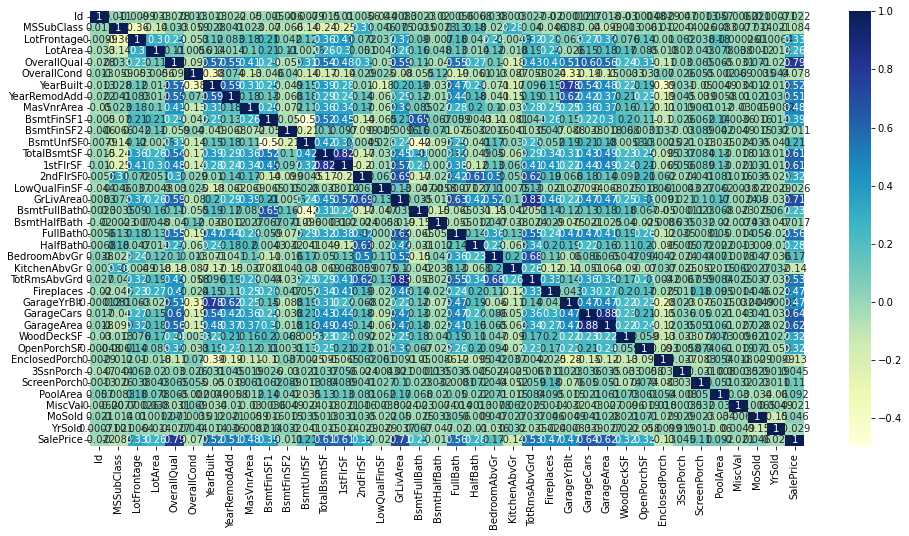

In [17]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


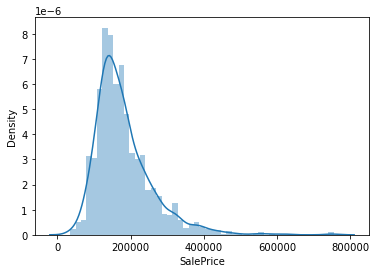

In [18]:
# target variable: price of house
sns.distplot(house['SalePrice'])
plt.show()

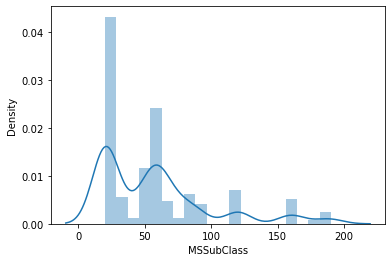

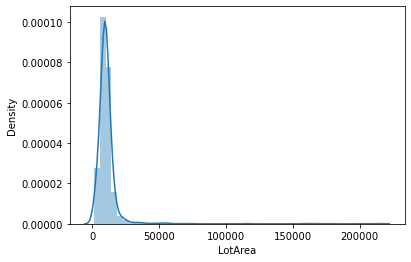

In [19]:
#checking the histogram of prediction variables
sns.distplot(house['MSSubClass'])

plt.show()
sns.distplot(house['LotArea'])
plt.show()

In [20]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = house.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [23]:
#defining the Variables to make the model We are target the predictor for sales 
y= house.pop('SalePrice')
X = house
#Predictors 
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [24]:
#Target Values 
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [25]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [26]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [27]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=240)

In [28]:
#splittrain and test with 70% for train the data 30% for test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
X_train.shape

(1021, 240)

In [29]:
###Model Building and Evalualtion 
##Linear Regression 

lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
# Print the coefficients and intercept
print(lm.intercept_)
#print(lm.coef_)

-51048992457445.75


In [31]:
#measuring the linear regression parameters 
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.949078758761562
-8.39185412047726e+20
324913102837.9832
2.3654224362261216e+33
318230267.22623235
5.400507845265118e+30


In [32]:
###Ridge regression
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [34]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=500)

In [35]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8837728022652246
0.8562233359392047
741610741052.865
405265084560.13214
726357239.0331684
925262750.137288


In [36]:
###Lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [38]:
#Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [39]:
#lasso.coef_

In [40]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9238298813921382
0.8445553424590814
486018584357.2097
438153803986.60175
476022119.840558
1000351150.6543419


In [41]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.490788e-01,8.837728e-01,9.238299e-01
1,R2 Score (Test),-8.391854e+20,8.562233e-01,8.445553e-01
2,RSS (Train),3.249131e+11,7.416107e+11,4.860186e+11
3,RSS (Test),2.365422e+33,4.052651e+11,4.381538e+11
4,MSE (Train),1.783901e+04,2.695102e+04,2.181793e+04
5,MSE (Test),2.323899e+15,3.041813e+04,3.162833e+04


In [42]:
##monitor the coefiecients after the regularation 
betas = pd.DataFrame(index=X.columns)

In [43]:
betas.rows = X.columns

In [44]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [45]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-8.028088e+02,-2767.549703,-6146.029776
LotFrontage,2.033272e+03,636.975073,-0.000000
LotArea,7.200935e+03,2779.420138,3940.824918
OverallQual,8.935318e+03,8802.763604,13203.843082
OverallCond,6.522311e+03,2743.256702,4647.411404
YearBuilt,1.258898e+04,1796.570798,7014.896811
YearRemodAdd,2.312423e+03,3051.430883,3222.408653
MasVnrArea,3.634305e+03,3935.959297,2966.081075
BsmtFinSF1,-2.944889e+15,2475.972798,2449.925090
BsmtFinSF2,-1.041590e+15,746.934188,0.000000


In [46]:
##Ridge by doubling the alpha
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=1000)

In [47]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8589661009775061
0.8415256127169408
899894830178.3965
446693741174.34814
881385729.8515147
1019848724.1423473


In [48]:
#Fitting Lasso model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [49]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8922519404953642
0.8421149934372774
687507913927.2139
445032446352.78894
673367202.6711203
1016055813.5908424


In [50]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.490788e-01,8.589661e-01,8.922519e-01
1,R2 Score (Test),-8.391854e+20,8.415256e-01,8.421150e-01
2,RSS (Train),3.249131e+11,8.998948e+11,6.875079e+11
3,RSS (Test),2.365422e+33,4.466937e+11,4.450324e+11
4,MSE (Train),1.783901e+04,2.968814e+04,2.594932e+04
5,MSE (Test),2.323899e+15,3.193507e+04,3.187563e+04


In [51]:
##monitor the coefiecients after the regularation 
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-8.028088e+02,-2051.646790,-6.222254e+03
LotFrontage,2.033272e+03,1186.558670,-0.000000e+00
LotArea,7.200935e+03,2321.697685,3.285154e+03
OverallQual,8.935318e+03,7277.141158,1.660786e+04
OverallCond,6.522311e+03,1964.368625,3.203209e+03
YearBuilt,1.258898e+04,1570.536872,5.582963e+03
YearRemodAdd,2.312423e+03,2729.588766,3.955263e+03
MasVnrArea,3.634305e+03,3676.247367,1.870666e+03
BsmtFinSF1,-2.944889e+15,2584.627561,1.699753e+02
BsmtFinSF2,-1.041590e+15,572.488698,0.000000e+00


In [52]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)

metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)

metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))

metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))

metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)

metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)

metric2.append(mse_test_lr**0.5)

##Lasso model
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised

alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)

metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)

metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))

metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))

metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)

metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)

metric3.append(mse_test_lr**0.5)
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

print(final_metric)
##monitor the coefiecients after the regularation 
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

             Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.490788e-01      9.410255e-01      9.490268e-01
1   R2 Score (Test)      -8.391854e+20      8.437869e-01      8.271659e-01
2       RSS (Train)       3.249131e+11      3.762988e+11      3.252446e+11
3        RSS (Test)       2.365422e+33      4.403197e+11      4.871697e+11
4       MSE (Train)       1.783901e+04      1.919789e+04      1.784811e+04
5        MSE (Test)       2.323899e+15      3.170641e+04      3.335055e+04


,Linear,Ridge,Lasso
MSSubClass,-8.028088e+02,-2703.869760,-1164.552929
LotFrontage,2.033272e+03,37.644509,1983.411171
LotArea,7.200935e+03,6265.161792,7027.885464
OverallQual,8.935318e+03,10563.817642,8958.601494
OverallCond,6.522311e+03,5421.107682,6491.255280
YearBuilt,1.258898e+04,7819.112529,12338.974056
YearRemodAdd,2.312423e+03,2284.192993,2303.331873
MasVnrArea,3.634305e+03,3600.320024,3675.694595
BsmtFinSF1,-2.944889e+15,4401.951830,7726.751798
BsmtFinSF2,-1.041590e+15,1257.056297,1477.341908


In [53]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)

metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)

metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))

metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))

metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)

metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)

metric2.append(mse_test_lr**0.5)

##Lasso model
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)

metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)

metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))

metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))

metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)

metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)

metric3.append(mse_test_lr**0.5)
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

print(final_metric)
##monitor the coefiecients after the regularation 
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

             Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.490788e-01      9.146698e-01      9.465714e-01
1   R2 Score (Test)      -8.391854e+20      8.569591e-01      8.366438e-01
2       RSS (Train)       3.249131e+11      5.444661e+11      3.409119e+11
3        RSS (Test)       2.365422e+33      4.031913e+11      4.604542e+11
4       MSE (Train)       1.783901e+04      2.309259e+04      1.827293e+04
5        MSE (Test)       2.323899e+15      3.034020e+04      3.242322e+04


,Linear,Ridge,Lasso
MSSubClass,-8.028088e+02,-4042.983268,-3863.436946
LotFrontage,2.033272e+03,-619.394130,1444.184436
LotArea,7.200935e+03,4251.483413,5682.736178
OverallQual,8.935318e+03,11352.897920,9691.571393
OverallCond,6.522311e+03,4061.328310,6349.403020
YearBuilt,1.258898e+04,3212.636007,10672.088959
YearRemodAdd,2.312423e+03,3078.649438,2398.115993
MasVnrArea,3.634305e+03,3929.884803,3732.062459
BsmtFinSF1,-2.944889e+15,1855.472757,6215.147254
BsmtFinSF2,-1.041590e+15,1059.020165,1314.033655


In [ ]:
# https://github.com/manishhegde/Case-Study-Surprise-House.git